# **Data Understanding**

## **Data Collection**

In [1]:
pip install numpy pandas seaborn matplotlib scikit-learn joblib

Note: you may need to restart the kernel to use updated packages.


In [2]:

import numpy as np 
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import joblib
# Suppress warnings
warnings.filterwarnings('ignore')

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
pd.set_option('display.max_columns', None)

In [3]:
testdata = pd.read_csv('test.csv')
traindata = pd.read_csv('train.csv')
traindata.head(10)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
5,5,Vani,Female,59.0,Ahmedabad,Working Professional,Finanancial Analyst,NaN,2.0,NaN,NaN,5.0,5-6 hours,Healthy,MCA,No,7.0,5.0,No,0
6,6,Ritvik,Male,47.0,Thane,Working Professional,Chemist,NaN,5.0,NaN,NaN,2.0,7-8 hours,Moderate,MD,No,6.0,2.0,No,0
7,7,Rajveer,Male,38.0,Nashik,Working Professional,Teacher,NaN,3.0,NaN,NaN,4.0,7-8 hours,Unhealthy,B.Pharm,No,10.0,3.0,Yes,0
8,8,Aishwarya,Female,24.0,Bangalore,Student,NaN,2.0,NaN,5.90,5.0,NaN,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
9,9,Simran,Female,42.0,Patna,Working Professional,Electrician,NaN,4.0,NaN,NaN,1.0,5-6 hours,Healthy,ME,Yes,7.0,2.0,Yes,0


In [4]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

## **Data Description**

In [5]:
print(traindata.describe(include='all'))

                   id    Name  Gender            Age    City  \
count   140700.000000  140700  140700  140700.000000  140700   
unique            NaN     422       2            NaN      98   
top               NaN   Rohan    Male            NaN  Kalyan   
freq              NaN    3178   77464            NaN    6591   
mean     70349.500000     NaN     NaN      40.388621     NaN   
std      40616.735775     NaN     NaN      12.384099     NaN   
min          0.000000     NaN     NaN      18.000000     NaN   
25%      35174.750000     NaN     NaN      29.000000     NaN   
50%      70349.500000     NaN     NaN      42.000000     NaN   
75%     105524.250000     NaN     NaN      51.000000     NaN   
max     140699.000000     NaN     NaN      60.000000     NaN   

       Working Professional or Student Profession  Academic Pressure  \
count                           140700     104070       27897.000000   
unique                               2         64                NaN   
top            

In [16]:
print(traindata.isnull().sum())

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64


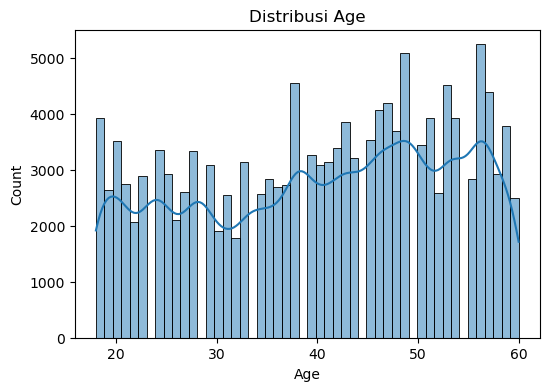

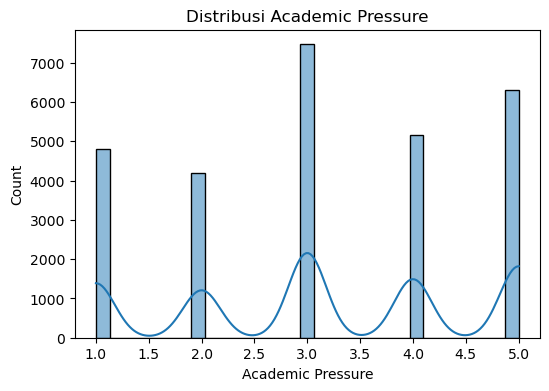

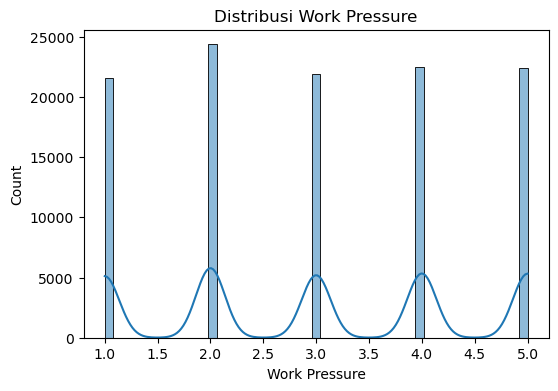

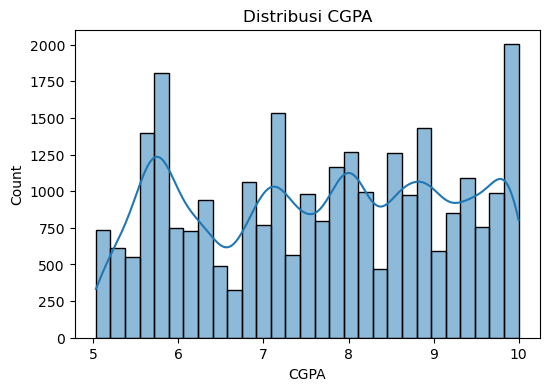

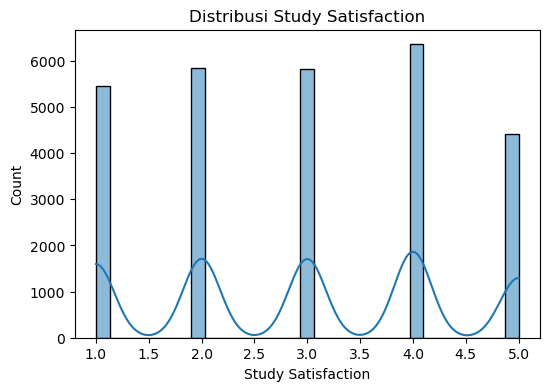

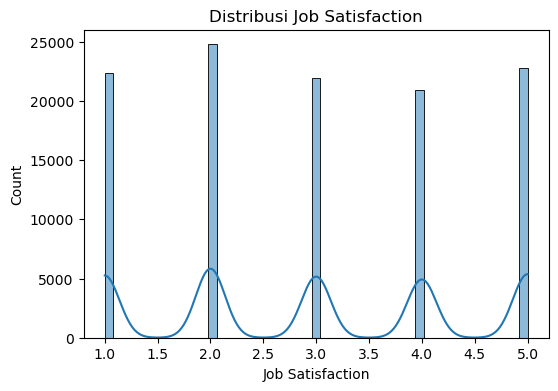

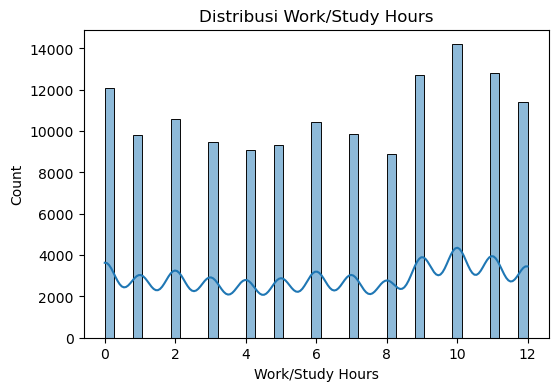

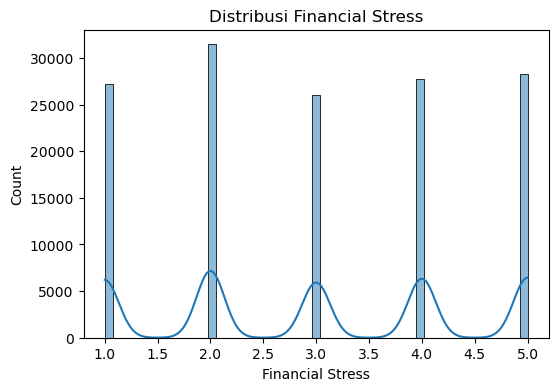

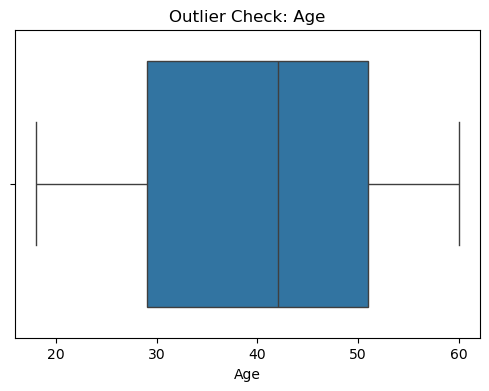

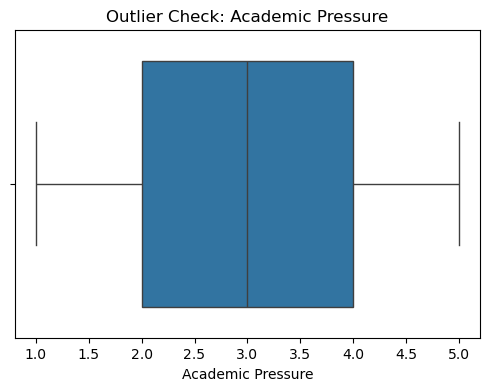

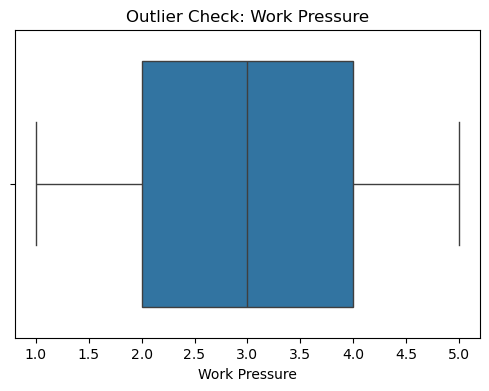

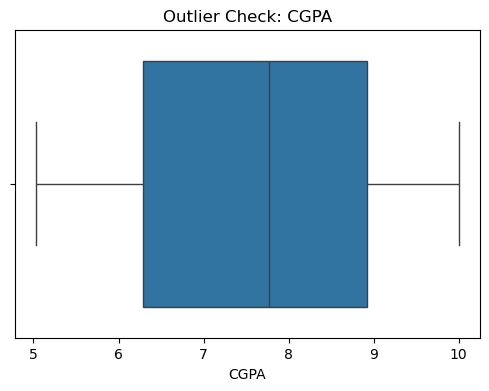

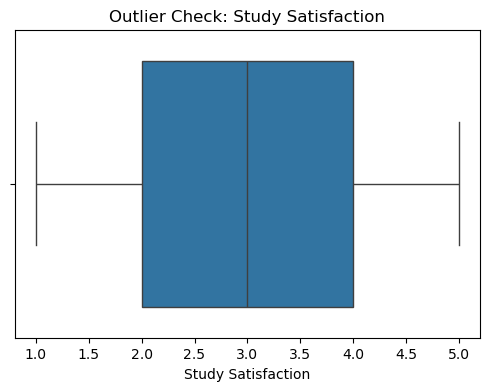

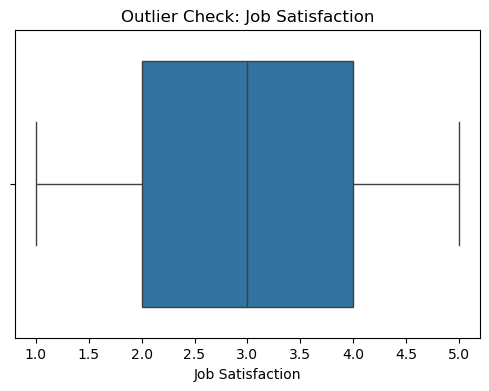

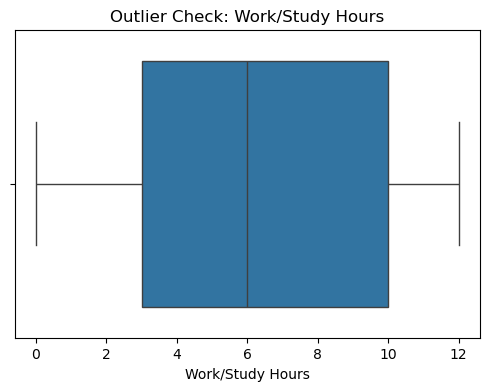

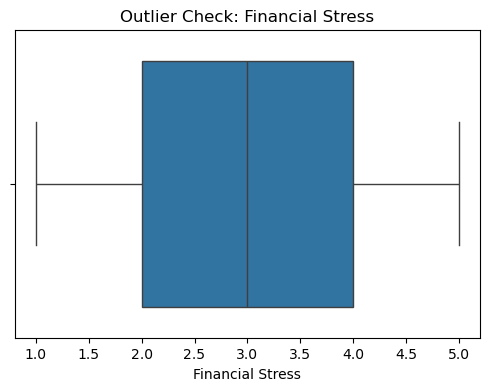

In [18]:
numerical_columns = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 
                     'Job Satisfaction', 'Work/Study Hours', 'Financial Stress']

# Distribusi histogram
for col in numerical_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(data=traindata, x=col, kde=True)
    plt.title(f'Distribusi {col}')
    plt.show()

# Boxplot outlier
for col in numerical_columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=traindata, x=col)
    plt.title(f'Outlier Check: {col}')
    plt.show()


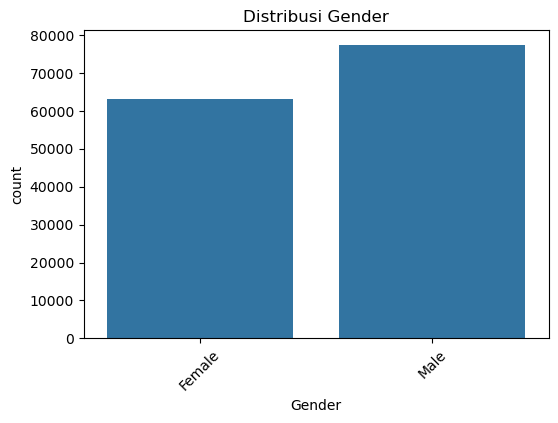

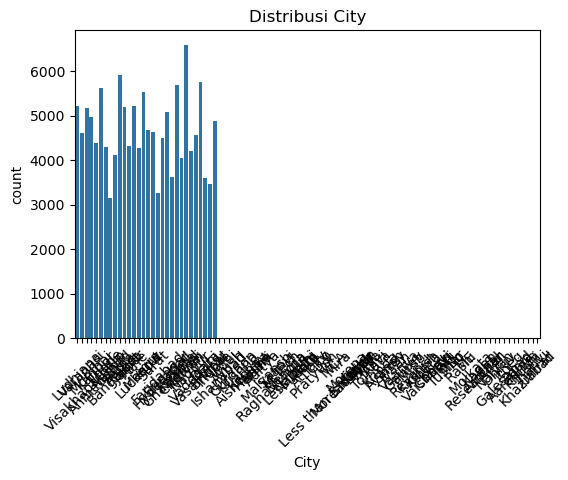

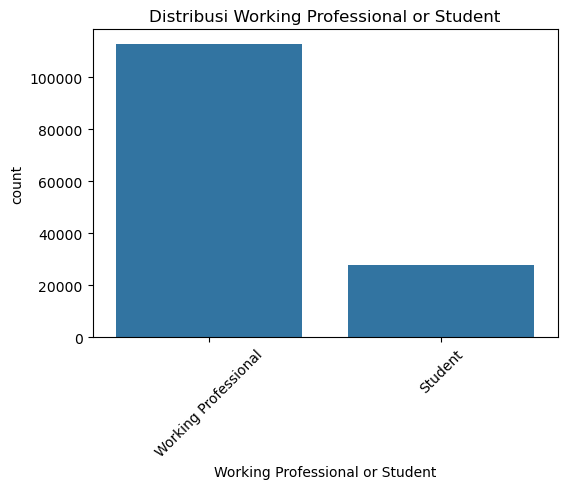

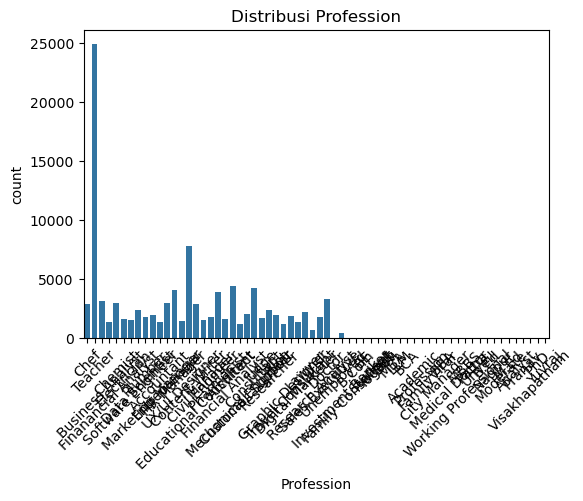

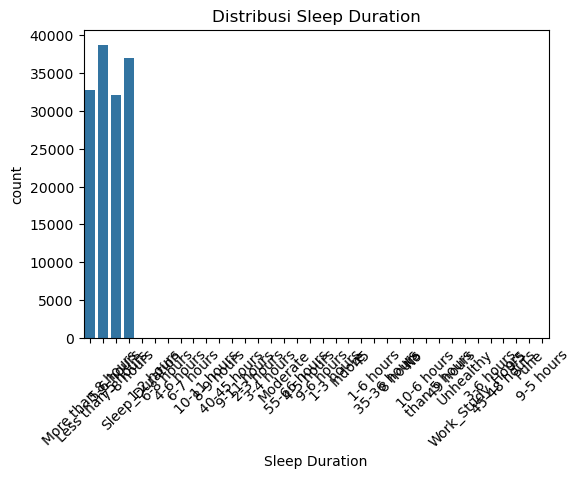

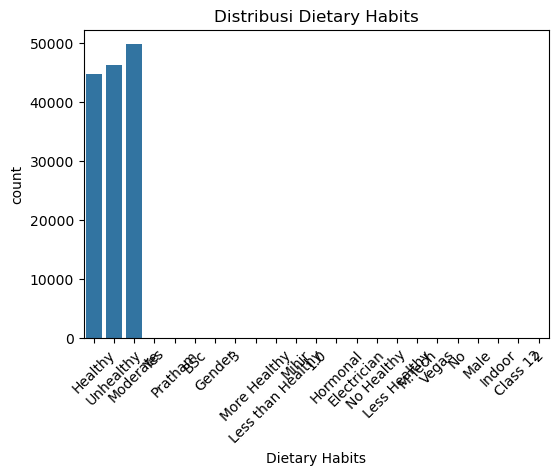

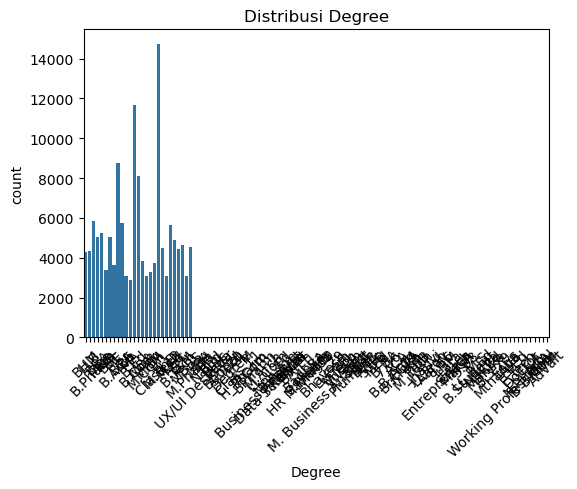

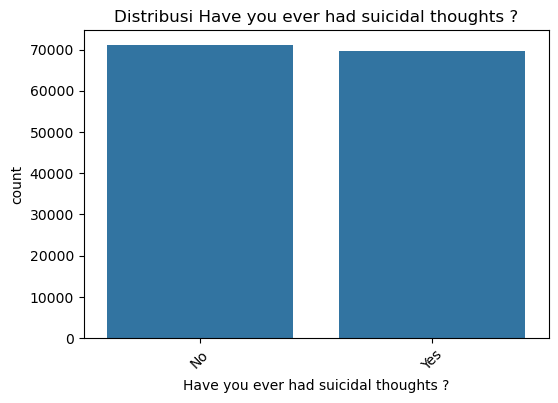

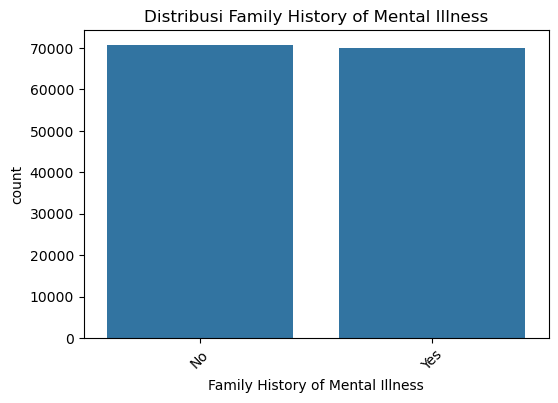

In [19]:
categorical_columns = ['Gender', 'City', 'Working Professional or Student', 'Profession', 'Sleep Duration',
                       'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?',
                       'Family History of Mental Illness']

for col in categorical_columns:
    plt.figure(figsize=(6,4))
    sns.countplot(data=traindata, x=col)
    plt.title(f'Distribusi {col}')
    plt.xticks(rotation=45)
    plt.show()


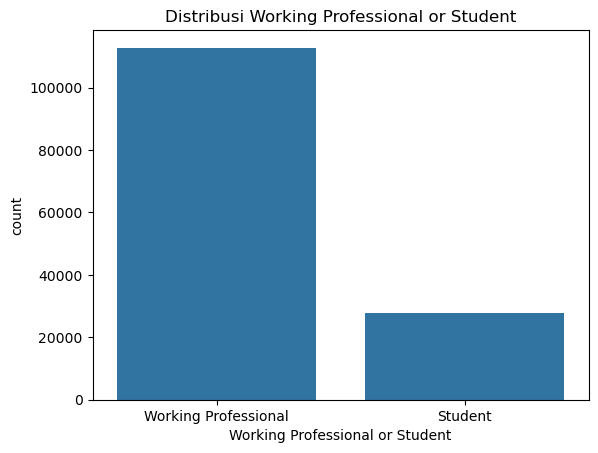

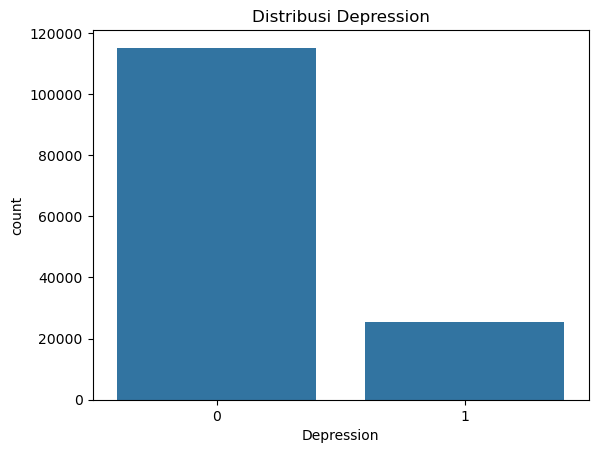

In [20]:
# Distribusi Working Professional or Student
sns.countplot(data=traindata, x='Working Professional or Student')
plt.title('Distribusi Working Professional or Student')
plt.show()

# Distribusi Depression
sns.countplot(data=traindata, x='Depression')
plt.title('Distribusi Depression')
plt.show()


## **Korelasi Antar Fitur Numerik**

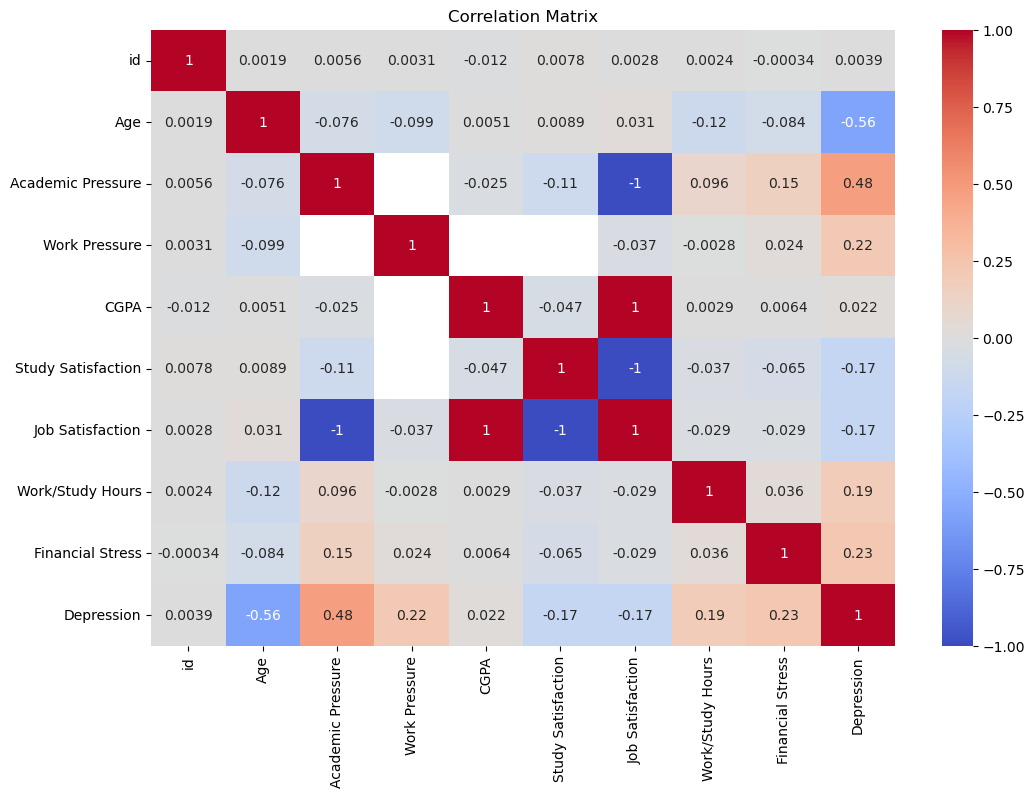

In [17]:
plt.figure(figsize=(12, 8))
sns.heatmap(traindata.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


# **Data Selection**

## **Check Data Type**

In [6]:
# Cek data type untuk atribut yang dipilih
traindata[['Age', 'Academic Pressure', 'Degree', 'Work/Study Hours', 'CGPA', 'Study Satisfaction', 'City']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Age                 140700 non-null  float64
 1   Academic Pressure   27897 non-null   float64
 2   Degree              140698 non-null  object 
 3   Work/Study Hours    140700 non-null  float64
 4   CGPA                27898 non-null   float64
 5   Study Satisfaction  27897 non-null   float64
 6   City                140700 non-null  object 
dtypes: float64(5), object(2)
memory usage: 7.5+ MB


## **Distribusi Target**

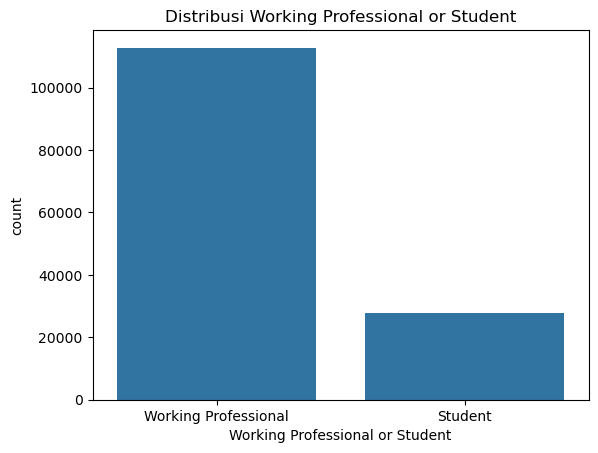

In [7]:
# Distribusi target
sns.countplot(data=traindata, x='Working Professional or Student')
plt.title('Distribusi Working Professional or Student')
plt.show()


## **Distribusi Atribut Numerik**

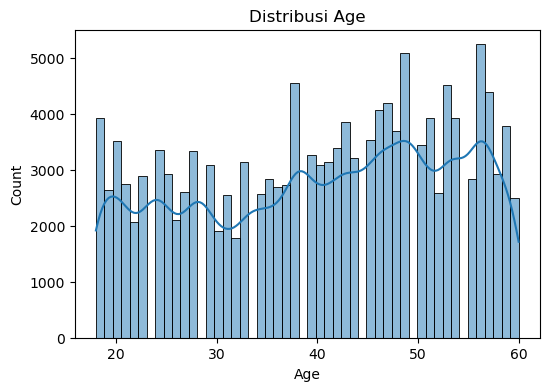

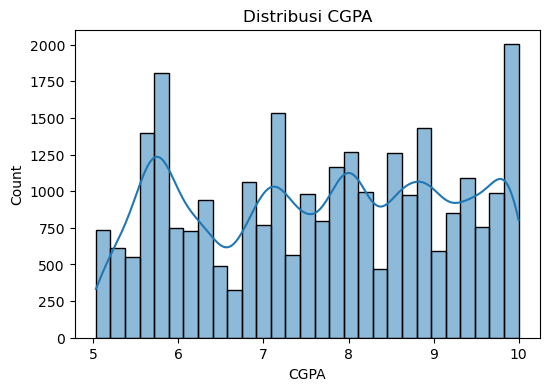

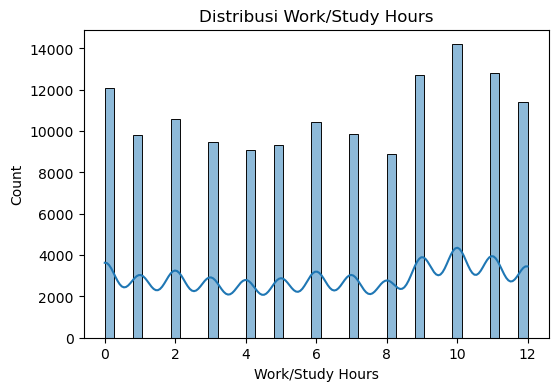

In [8]:
numerical_columns = ['Age', 'CGPA', 'Work/Study Hours']

for col in numerical_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(data=traindata, x=col, kde=True)
    plt.title(f'Distribusi {col}')
    plt.show()


## **Distribusi Atribut Kategorikal**

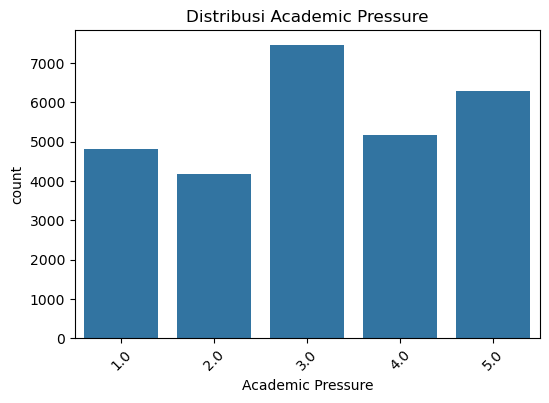

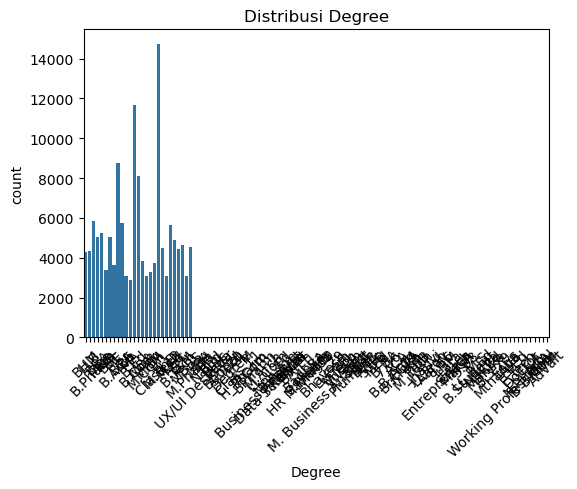

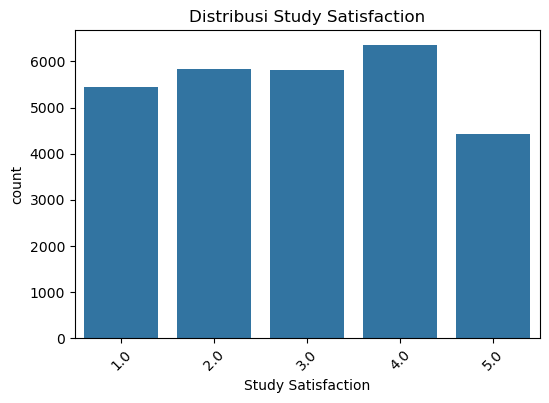

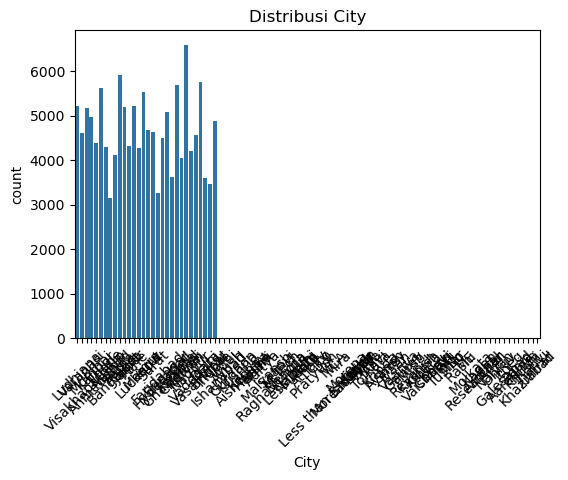

In [9]:
categorical_columns = ['Academic Pressure', 'Degree', 'Study Satisfaction', 'City']

for col in categorical_columns:
    plt.figure(figsize=(6,4))
    sns.countplot(data=traindata, x=col)
    plt.title(f'Distribusi {col}')
    plt.xticks(rotation=45)
    plt.show()


## **Check Outlier**

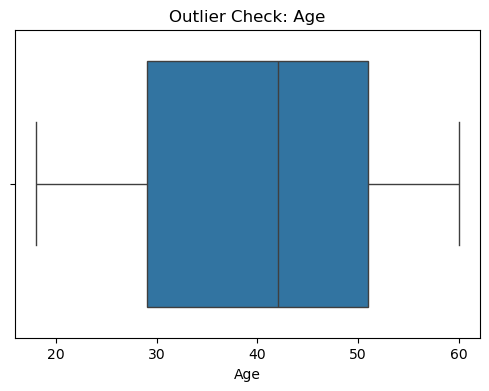

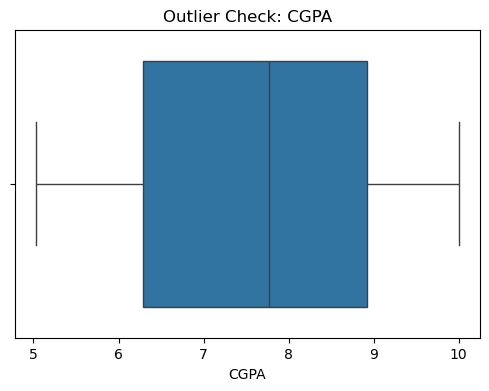

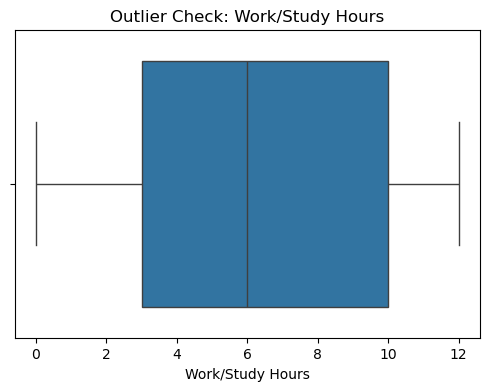

In [10]:
for col in numerical_columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=traindata, x=col)
    plt.title(f'Outlier Check: {col}')
    plt.show()


## **Cek Missing Values**

In [15]:
print(traindata.isnull().sum())

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64


In [14]:
print(traindata.nunique())

id                                       140700
Name                                        422
Gender                                        2
Age                                          43
City                                         98
Working Professional or Student               2
Profession                                   64
Academic Pressure                             5
Work Pressure                                 5
CGPA                                        331
Study Satisfaction                            5
Job Satisfaction                              5
Sleep Duration                               36
Dietary Habits                               23
Degree                                      115
Have you ever had suicidal thoughts ?         2
Work/Study Hours                             13
Financial Stress                              5
Family History of Mental Illness              2
Depression                                    2
dtype: int64


# **Data Preparation**